<a href="https://colab.research.google.com/github/saisriteja/facial-emotion-recognition/blob/master/facial%20landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d avinash7a7/twins-expression
!unzip /content/twins-expression.zip

{'kaggle.json': b'{"username":"avinash7a7","key":"26accef6b065fa210ab6235365114137"}'}

In [0]:
!git clone https://github.com/keyurr2/facial-landmarks.git #getting facial landmarks

Cloning into 'facial-landmarks'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.


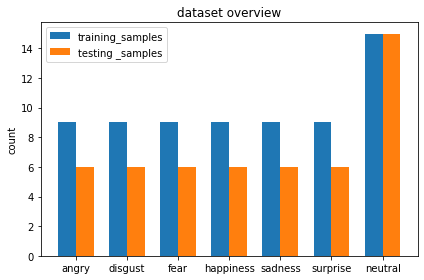

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['angry','disgust','fear','happiness','sadness','surprise','neutral']
training = [9,9,9,9,9,9,15]
testing = [6,6,6,6,6,6,15]

ind = np.arange(len(labels))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, training, width, 
                label='training_samples')
rects2 = ax.bar(ind + width/2, testing, width, 
                label='testing _samples')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('dataset overview')
ax.set_xticks(ind)
ax.set_xticklabels(('angry','disgust','fear','happiness','sadness','surprise','neutral'))
ax.legend()


fig.tight_layout()

plt.show()

#Facial Landmarks

In [30]:
!git clone https://github.com/AKSHAYUBHAT/TensorFace.git

Cloning into 'TensorFace'...
remote: Enumerating objects: 291, done.
remote: Total 291 (delta 0), reused 0 (delta 0), pack-reused 291
Receiving objects: 100% (291/291), 80.30 MiB | 29.20 MiB/s, done.
Resolving deltas: 100% (67/67), done.


resources:
dlibs : pretrained model for face landmarks detection https://pysource.com/2019/03/12/face-landmarks-detection-opencv-with-python/

masking of blue colour : [opencv](https://opencv-python-tutroals.readthedocs.io/en/latest/)

In [0]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("TensorFace/openface/models/dlib/shape_predictor_68_face_landmarks.dat")
def landmarks(frame):
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = detector(gray)
  points = []
  for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

        landmarks = predictor(gray, face)

        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            points.append([x,y])
            cv2.circle(frame, (x, y), 4, (255, 0, 0), -1)
  return (np.array(frame),np.array(points))

def blue_marks(frame):
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  lower_red = np.array([110,50,50]) 
  upper_red = np.array([130,255,255]) 

  mask = cv2.inRange(hsv, lower_red, upper_red) 
  res = cv2.bitwise_and(frame,frame, mask= mask) 
  #image = frame

  gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
  edged = cv2.Canny(gray, 30, 200) 
  contours, hierarchy = cv2.findContours(edged,  
      cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  cv2.drawContours(frame, contours, -1, (0, 255, 0), 3) 
  return frame

In [0]:
import cv2
import numpy as np
import dlib

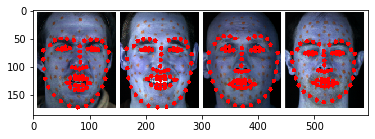

In [120]:
img = cv2.imread('/content/DataRec.png')
plt.imshow(img,cmap = 'gray')
facial_landmarks,_ = landmarks(img)
plt.imshow(facial_landmarks)

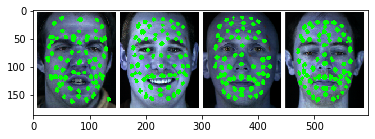

In [121]:
img = cv2.imread('/content/DataRec.png')
plt.imshow(img,cmap = 'gray')
blue_maker = blue_marks(img)  
plt.imshow(blue_maker)

In [0]:
os.mkdir('data')

In [0]:
import cv2

out = cv2.VideoWriter('/content/data/output.avi', -1, 20.0, (640,480))

all_landmarks = dict()


def vidtoframes(videoFile):
 vidcap = cv2.VideoCapture(videoFile)
 success,image = vidcap.read()
 count = 0
 all_points = []
 while success:
    img_source = image
    _,facial_landmarks = landmarks(img_source)
    #print(facial_landmarks)
    #plt.imshow(facial_landmarks)
    #out.write(facial_landmarks)
    all_points.append(facial_landmarks)
    success,image = vidcap.read()
    
    count += 1

 all_landmarks[videoFile] = all_points



In [170]:
import glob
from tqdm import tqdm 
files = list(glob.glob('/content/train_data/*.avi'))
for fi in tqdm(files): 
  vidtoframes(fi)

100%|██████████| 63/63 [03:52<00:00,  3.77s/it]


In [173]:
len(all_landmarks.keys())

63

In [139]:
np.array(all_landmarks['/content/train_data/a2.avi']).shape

(206, 68, 2)

In [0]:
def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [0]:
save_obj(all_landmarks,'training')
info = load_obj('training')